<a href="https://colab.research.google.com/github/GeetanjaliWadhwa/GRIPJULY2021/blob/main/GRIP_TASK1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **THE SPARKS FOUNDATION**

GRIP JULY 2021

DATA SCIENCE AND BUSINESS ANALYTICS 

BY: GEETANJALI


## **TASK 1: Prediction using Supervised ML**


Predict the percentage of a student based on the number of study hours

In [65]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [66]:
student_data = pd.read_csv('/content/Student.csv')  #read the data from a file

In [67]:
student_data  #display the data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [68]:
print("student_data is of type", type(student_data))   #returns the type of data

student_data is of type <class 'pandas.core.frame.DataFrame'>


In [69]:
print("Shape of student_data is",student_data.shape)  #gives the number of rows and columns in data frame

Shape of student_data is (25, 2)


In [70]:
student_data.head()   #To display first 5 rows of the data frame

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [71]:
student_data.tail(3)   #returns the last 3 rows of the data frame

,Hours,Scores
22,3.8,35
23,6.9,76
24,7.8,86


In [72]:
student_data.isnull().any()   #it checks if there is any null value in each column

Hours     False
Scores    False
dtype: bool

In [74]:
student_data.info()  #provides all the information of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [33]:
student_data.describe()   #details about the DataFrame

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [34]:
student_data['Hours'].value_counts()   #count the number of study hours

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64

In [35]:
student_data['Scores'].value_counts()  #count the scores

30    3
95    1
62    1
85    1
86    1
67    1
24    1
69    1
17    1
41    1
42    1
75    1
47    1
76    1
81    1
20    1
21    1
54    1
88    1
25    1
27    1
60    1
35    1
Name: Scores, dtype: int64

In [36]:
student_data['Hours'].unique()  #gives the unique values of hours

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

In [37]:
student_data['Scores'].unique()   #gives the unique values of Scores

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86])

## **VISUALISING DATA**

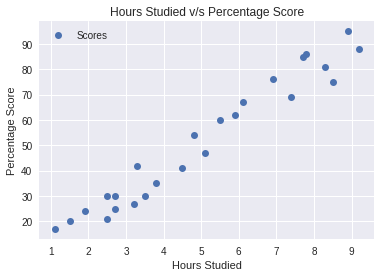

In [75]:
#Plotting a 2D graoh showing the distribution of scores and study hours
student_data.plot(x='Hours', y='Scores', title= "Hours Studied v/s Percentage Score",style='o')
plt.style.use('seaborn')
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show(block=True)


In [76]:
student_data.corr(method='pearson') #calculating the Pearson's correlation coefficient

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


It clearly shows that there is a positive linear relation between the number of hours studied and the percentage of score.

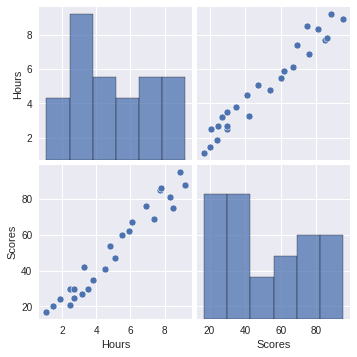

In [46]:
sb.pairplot(student_data)  #to show pair wise relationship in a dataset

PREPARING THE DATA

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [47]:
x = student_data.iloc[:,: -1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [48]:
y = student_data.iloc[:, 1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [51]:
from sklearn.model_selection import train_test_split    
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 
#it splits 80% of the data to the training set while 20% of the data to the test set. The proportion of the test set is specified ysing test_size

## **TRAINING THE ALGORITHM**

In [52]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


In [56]:
#value of the intercept calculated by the linear regression algorithm for our dataset
y0= regressor.intercept_
print("Intercept of the regression line is: ",y0)

Intercept of the regression line is:  2.018160041434662


In [55]:
#value of the slope calculated by the linear regression algorithm for our dataset
m= regressor.coef_
print("Slope of the regression line is: ",m)

Slope of the regression line is:  [9.91065648]


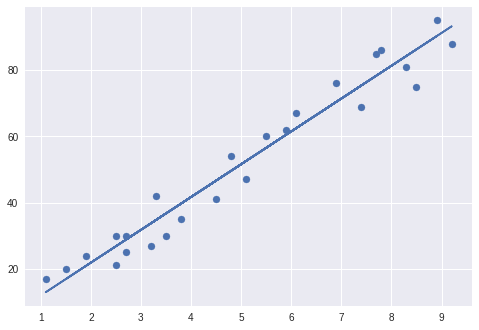

In [57]:
# Plotting the regression line
line = m*x + y0

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

## **MAKING PREDICTIONS**

In [61]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores
print("\n Predicted scores: ", y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]

 Predicted scores:  [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [63]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


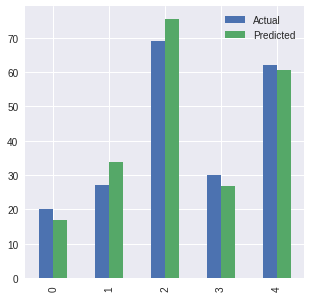

In [78]:
# Visualizing the comparison of actual and predicted data using a bar graph
df.plot(kind='bar', figsize= (5,5))
plt.show()

## **EVALUATING THE MODEL**


The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:
1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Squared Error

In [83]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


# What will be the predicted score if a student studies for 9.25 hours/day ?

In [82]:
#Test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**CONCLUSION:**

**From the above algorithm, we can say that if a student studied for 9.25 hours in a day, then he/she will secure 93.691 marks.**